# 의사결정나무(Decision Tree)
결정트리는 **분류**와 **회귀**, **다중 출력** 작업도 가능한 알고리즘이다. 데이터의 규칙을 학습을 통해서 자동으로 찾아내 **트리 기반**의 분류 규칙을 만든다. IF/ELSE 형태를 띄기 때문에 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 성능을 좌우한다.

<br>

결정트리는 **루트노드**부터 **리프노트**까지 데이터로부터 생성한 규칙을 기준으로 예측을 결정하게 된다. 루트노드에서 시작하여 각 **규칙노드**로부터 **브랜치/서브 트리**를 생성하여 데이터를 분류하고 최종적으로 **리프노드**에서 결정값을 예측한다. 많은 규칙이 존재하는 경우 결정이 복잡해지고 이는 곧 **과적합**을 일으키기 쉽다.

<br>

정보의 균일도를 측정하는 방법은 엔트로피를 활용한 **정보 이득 지수**와 **지니계수**가 있다. 정보이득은 **엔트로피**를 기반으로 하며 데이터의 **혼잡도**를 의미한다. 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다. 이 때 정보 이득 지수는 (1 - 엔트로피 지수)이다. 지니계수는 0이 가장 평등하고 1로 갈수록 불공평하다. 즉 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 지니 계수가 높은 속성을 기준으로 분할한다.

<br>

기대 집단의 사람들 중 가장 좋은 많응을 보일 **고객의 유치방안을 예측**하고자 하는 경우에는 **예측력**에 치중한다. 신용평가에서는 심사 결과 부적격 판정이 나온 경우 고객에게 부적격 이유를 설명해야 하므로 **해석력**에 치중한다.

<br>

> **장점**
- 결과를 설명하기에 용이하다.
- 모형을 만드는 방법이 간단하다.
- 대용량 데이터에서도 빠르게 만들 수 있다.
- 비정상 잡음 데이터에 대해서도 민감함 없이 분류가 가능하다.
- 상관성이 높은 변수가 있어도 크게 영향을 받지 않는다.
- 전처리가 거의 필요하지 않으며 스케일링 작업이 필요하지 않다.

<br>

> **단점**
- 과대적합 가능성이 높다.
- 분류 경계선 부근의 자료값에 대해서 오차가 크다.
- 설명변수 간의 중요도를 판단하기 쉽지 않다.

<br>

> **파라미터**
- `min_samples_split` : 노드를 분할하기 위한 최소 샘플 수
- `min_samples_leaf` : 리프노드가 되기 위한 최소한의 샘플 데이터 수
- `max_features` : 최대 feature 개수
- `max_depth` : 트리의 최대 깊이
- `max_leaf_nodes` : 리프노드의 최대 개수

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pip install graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

## 분류(Classification)

In [5]:
df1 = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
df1['target'] = load_breast_cancer().target

In [6]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X1 = df1.iloc[:, :-1]
y1 = np.array(df1['target'])

In [8]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_X1, y1, test_size=0.2, random_state=94)

In [10]:
dt = DecisionTreeClassifier(random_state=94)
dt.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=94)

In [11]:
pred = dt.predict(X1_test)

In [13]:
acc = accuracy_score(y1_test, pred)
acc

0.9385964912280702

<function matplotlib.pyplot.show(*args, **kw)>

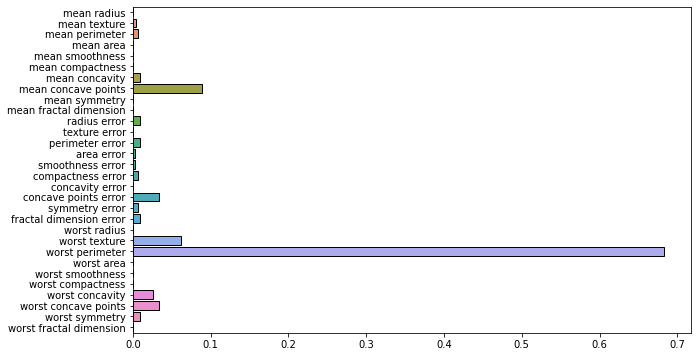

In [35]:
# 변수 중요도
plt.figure(figsize=(10, 6))
sns.barplot(y=X1.columns.tolist(), x=dt.feature_importances_, edgecolor=(0, 0, 0))
plt.show

### 트리 시각화

In [21]:
# 텍스트를 통한 시각화
r = tree.export_text(decision_tree=dt, feature_names=df1.columns[:-1].tolist())
print(r)

|--- worst perimeter <= -0.07
|   |--- worst concave points <= 0.31
|   |   |--- radius error <= 2.32
|   |   |   |--- area error <= 0.19
|   |   |   |   |--- smoothness error <= -1.25
|   |   |   |   |   |--- mean perimeter <= -0.30
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- mean perimeter >  -0.30
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  -1.25
|   |   |   |   |   |--- worst texture <= 1.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  1.25
|   |   |   |   |   |   |--- worst texture <= 1.28
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  1.28
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- area error >  0.19
|   |   |   |   |--- symmetry error <= 0.51
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- symmetry error >  0.51
|   |   |   |   |   |--- class: 1
|   |   |--- radius error >  2.32
|   |   |   |--- class: 0
|   |--- worst concave p

[Text(0.5646551724137931, 0.9375, 'X[22] <= -0.069\ngini = 0.469\nsamples = 455\nvalue = [171, 284]'),
 Text(0.35344827586206895, 0.8125, 'X[27] <= 0.311\ngini = 0.085\nsamples = 270\nvalue = [12, 258]'),
 Text(0.25862068965517243, 0.6875, 'X[10] <= 2.318\ngini = 0.031\nsamples = 254\nvalue = [4, 250]'),
 Text(0.22413793103448276, 0.5625, 'X[13] <= 0.19\ngini = 0.023\nsamples = 253\nvalue = [3, 250]'),
 Text(0.13793103448275862, 0.4375, 'X[14] <= -1.249\ngini = 0.016\nsamples = 250\nvalue = [2, 248]'),
 Text(0.06896551724137931, 0.3125, 'X[2] <= -0.3\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.034482758620689655, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10344827586206896, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20689655172413793, 0.3125, 'X[21] <= 1.249\ngini = 0.008\nsamples = 246\nvalue = [1, 245]'),
 Text(0.1724137931034483, 0.1875, 'gini = 0.0\nsamples = 228\nvalue = [0, 228]'),
 Text(0.2413793103448276, 0.1875, 'X[21] <= 1.284\ngini

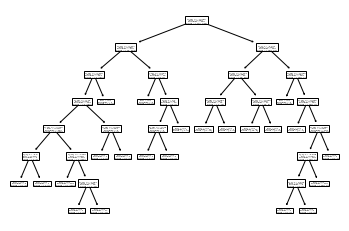

In [22]:
# plot tree를 이용한 시각화
tree.plot_tree(dt)

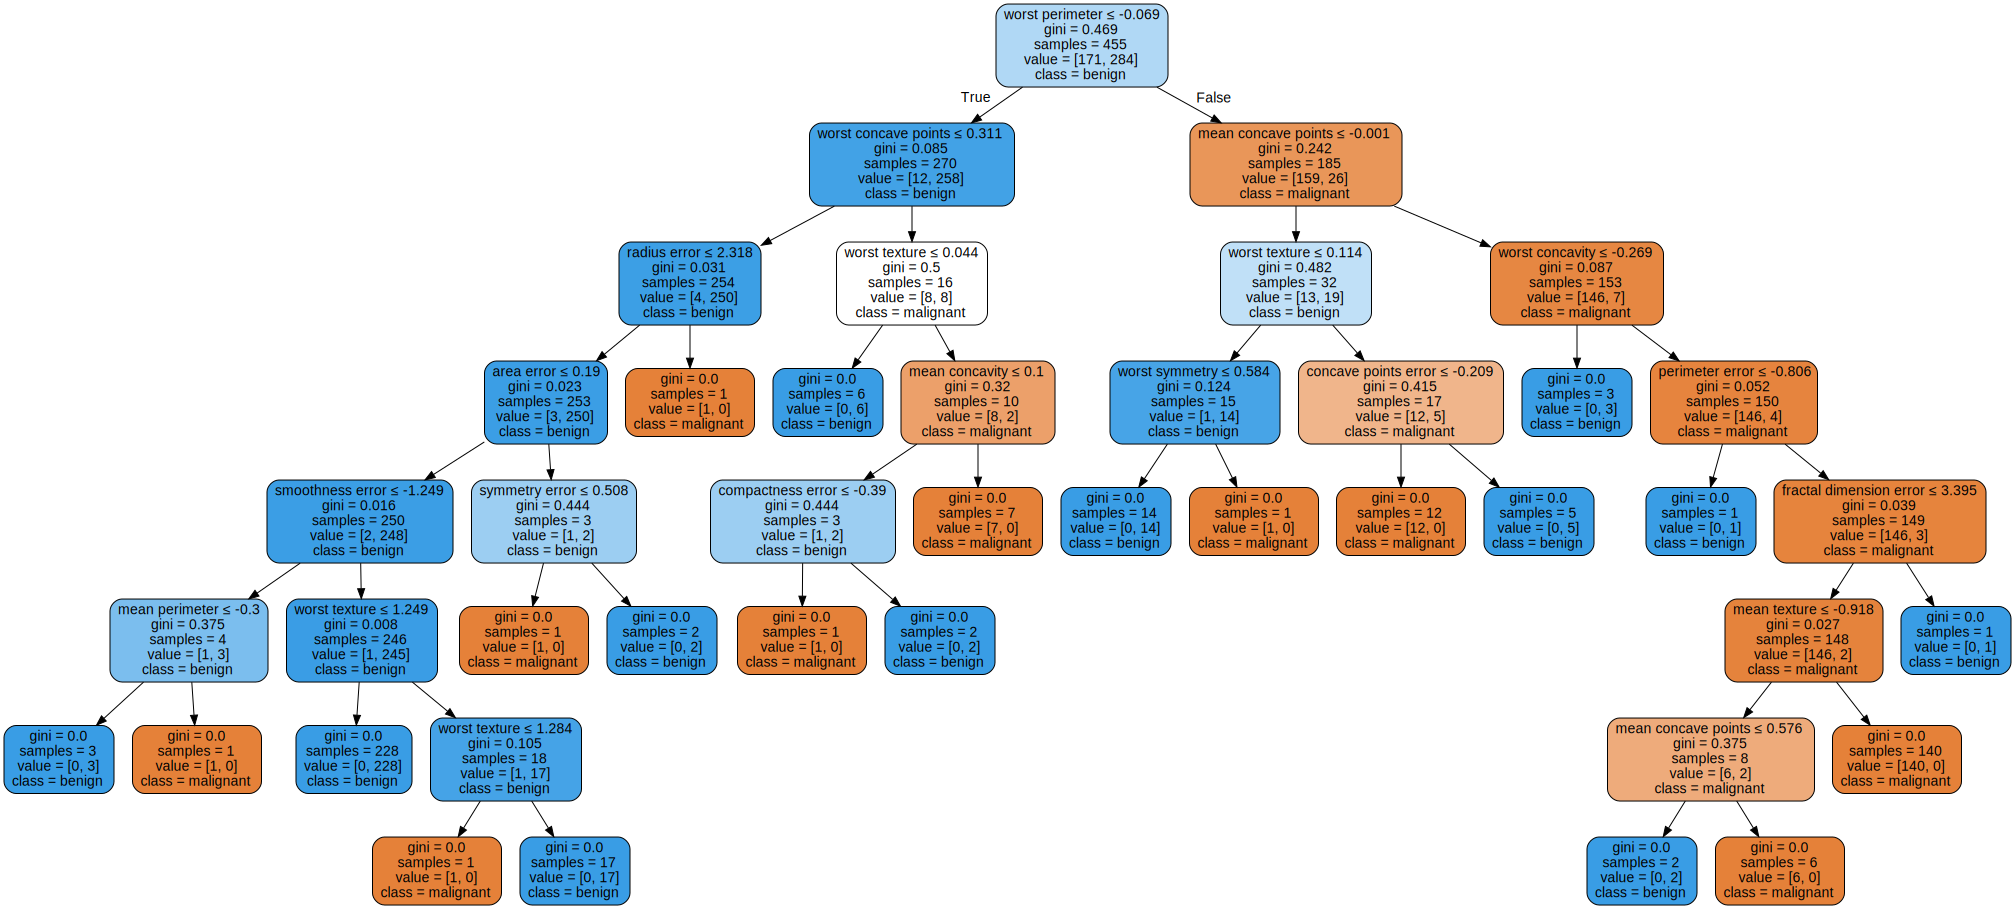

In [32]:
# pip install graphviz

# graphviz를 이용한 시각화
dot_data = tree.export_graphviz(decision_tree=dt, feature_names=df1.columns[:-1].tolist(),
                                class_names=['malignant', 'benign'],
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph

## 회귀(Regression)
```python
model = DecisionTreeRegressor()
```